# Import modules

In [42]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import os

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

#Mount Google Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Training and testing data paths

In [23]:
training_data_path = '/content/drive/MyDrive/Colab Notebooks/Forest_Fire_Dataset/Forest_Fire_Dataset/Training'
testing_data_path = '/content/drive/MyDrive/Colab Notebooks/Forest_Fire_Dataset/Forest_Fire_Dataset/Testing'

# Data preprocessing

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=42,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    testing_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=42
)

print(f"Number of training images: {train_generator.samples}")
print(f"Number of validation images: {val_generator.samples}")
print(f"Number of testing images: {test_generator.samples}")

Found 1216 images belonging to 2 classes.
Found 304 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Number of training images: 1216
Number of validation images: 304
Number of testing images: 380


# CNN-Sigmoid model architecture

In [25]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

#Train CNN-Sigmoid model

In [26]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6987 - loss: 1.4524 - val_accuracy: 0.9375 - val_loss: 0.3563
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9215 - loss: 0.1964 - val_accuracy: 0.9704 - val_loss: 0.1491
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9420 - loss: 0.1351 - val_accuracy: 0.9046 - val_loss: 0.2510
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9457 - loss: 0.1348 - val_accuracy: 0.9572 - val_loss: 0.1505
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9636 - loss: 0.1178 - val_accuracy: 0.9441 - val_loss: 0.1978
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9602 - loss: 0.0997 - val_accuracy: 0.9704 - val_loss: 0.1185
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9862 - loss: 0.0499 - val_accuracy: 0.9704 - val_loss: 0.1315
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9839 - loss: 0.0491 - val_accuracy: 0.9474 - val_loss:

# Save trained model


In [29]:
model.save('cnn_sigmoid_model.keras')

# Plot Training vs Validation Accuracy

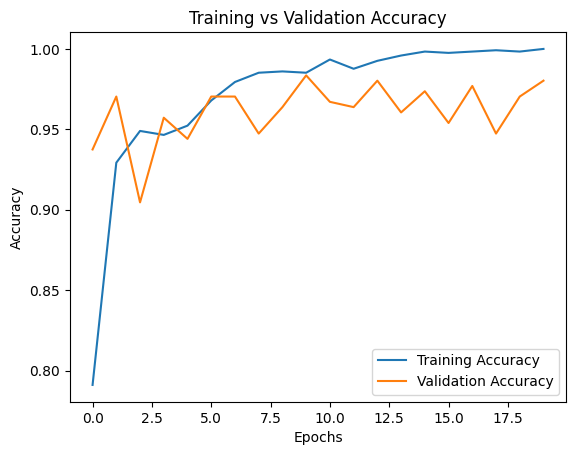

In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Training vs Validation Loss

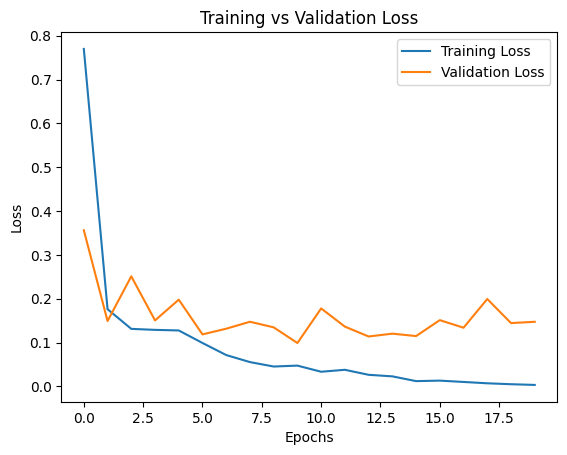

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Evaluate model

In [32]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


11/11 ━━━━━━━━━━━━━━━━━━━━ 105s 10s/step - accuracy: 0.9750 - loss: 0.1019
Test Loss: 0.1617
Test Accuracy: 0.9659
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step

Classification Report:
              precision    recall  f1-score   support

        fire       0.95      0.98      0.96       190
      nofire       0.98      0.95      0.96       190

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380



# Plot Confusion matrix

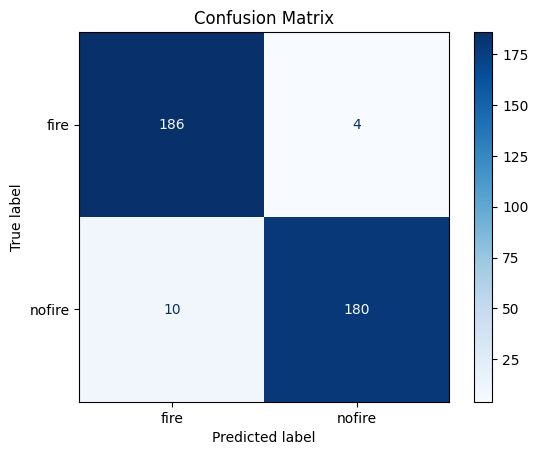

In [34]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Load CNN-Sigmoid model

In [58]:
model = load_model('/content/cnn_sigmoid_model.h5')  # Make sure path is correct

# Dummy input to initialize model (optional)
dummy_input = np.zeros((1, 150, 150, 3))
_ = model(dummy_input)

# Create CNN feature extractor (remove last Dense layer)
input_tensor = Input(shape=(150, 150, 3))
x = input_tensor
for layer in model.layers[:-1]:  # Exclude final Dense(1, sigmoid) layer
    x = layer(x)

cnn_feature_extractor = Model(inputs=input_tensor, outputs=x)
cnn_feature_extractor.trainable = False


# Train CNN-SVM model

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline: StandardScaler + Linear SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

# Extract features and labels from training set
all_features = []
all_labels = []

for i in range(len(train_generator)):
    imgs, lbls = train_generator[i]
    feats = cnn_feature_extractor.predict(imgs)
    feats = feats.reshape(feats.shape[0], -1)  # Flatten CNN features
    all_features.append(feats)
    all_labels.append(lbls)

# Stack batches into single arrays
X_train = np.vstack(all_features)
y_train = np.hstack(all_labels)

# Train SVM
svm_model.fit(X_train, y_train)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

#Extract test features and run predictions

In [60]:
# Extract features and labels from test set
test_features = []
test_labels = []

for i in range(len(test_generator)):
    imgs, lbls = test_generator[i]
    feats = cnn_feature_extractor.predict(imgs)
    feats = feats.reshape(feats.shape[0], -1)
    test_features.append(feats)
    test_labels.append(lbls)

# Stack batches into single arrays
X_test = np.vstack(test_features)
y_test = np.hstack(test_labels)

# Predict test labels
y_pred_svm = svm_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


# Evaluate CNN-SVM model

Test Accuracy (CNN-SVM): 0.9605

Classification Report (CNN-SVM):
              precision    recall  f1-score   support

        fire       0.95      0.97      0.96       190
      nofire       0.97      0.95      0.96       190

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380


Confusion Matrix (CNN-SVM):
[[185   5]
 [ 10 180]]


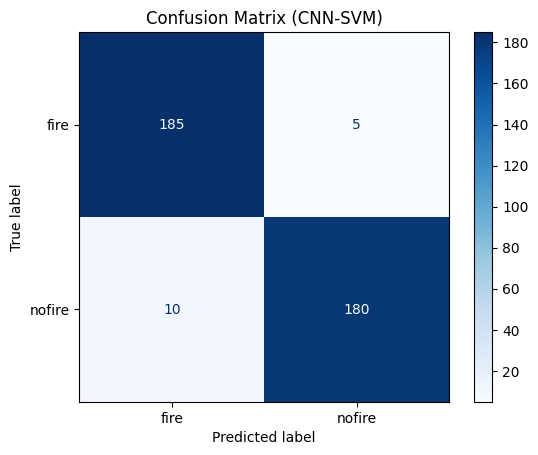

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Test Accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy (CNN-SVM): {test_accuracy_svm:.4f}")

# Classification Report
print("\nClassification Report (CNN-SVM):")
print(classification_report(y_test, y_pred_svm, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (CNN-SVM):")
print(cm_svm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CNN-SVM)')
plt.show()
